# Applying custom preprocessing to images

In [2]:
import cv2
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
print(tf.__version__)

2.12.0


In [21]:
def apply_CLAHE_filter(image, clipLimit=2.0, tileGridSize=(8,8)):
    clahe = cv2.createCLAHE(clipLimit=clipLimit,
                            tileGridSize=tileGridSize)
    image = clahe.apply(tf.make_ndarray(tf.make_tensor_proto(image)))
    return image

In [26]:
def read_and_decode(filename, preprocessing=0):
    img = tf.io.read_file(filename)
    img = tf.image.decode_jpeg(img, channels=1)
    img = tf.py_function(apply_CLAHE_filter, [img], tf.float32)    
    return tf.convert_to_tensor(tf.expand_dims(img, axis=-1))

def decode_csv(csv_row):
    record_defaults = ["filepaths", "labels"]
    filename, label_string = tf.io.decode_csv(csv_row, record_defaults)
    img = read_and_decode(filename)
    # label = tf.math.equal(CLASS_NAMES, label_string)
    return tf.convert_to_tensor(img), tf.convert_to_tensor(label_string)

In [27]:
read_and_decode("C:/Users/pedro/OneDrive/Escritorio/Proyecto_IA_SS/Cancer_de_Mama_IA_SS_2023/data/raw_images/16754_1801566584.png")

<tf.Tensor: shape=(256, 256, 1), dtype=float32, numpy=
array([[[206.],
        [202.],
        [187.],
        ...,
        [  3.],
        [  3.],
        [  3.]],

       [[187.],
        [170.],
        [181.],
        ...,
        [  3.],
        [  3.],
        [  3.]],

       [[170.],
        [162.],
        [184.],
        ...,
        [  3.],
        [  3.],
        [  3.]],

       ...,

       [[139.],
        [124.],
        [124.],
        ...,
        [  3.],
        [  3.],
        [  3.]],

       [[136.],
        [119.],
        [ 97.],
        ...,
        [  3.],
        [  3.],
        [  3.]],

       [[124.],
        [ 99.],
        [ 97.],
        ...,
        [  3.],
        [  3.],
        [  3.]]], dtype=float32)>

In [38]:
x = decode_csv("C:/Users/pedro/OneDrive/Escritorio/Proyecto_IA_SS/Cancer_de_Mama_IA_SS_2023/data/raw_images/10006_462822612.png,0")

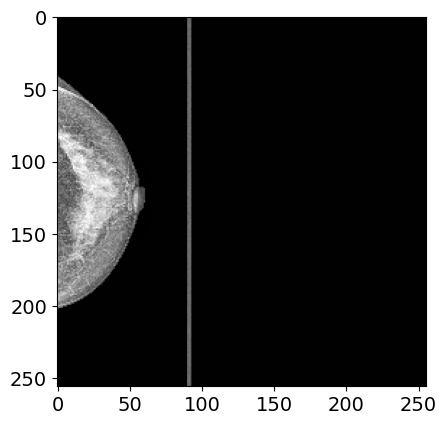

In [39]:
plt.imshow(x[0], cmap="gray");

In [30]:
dataset = (tf.data.TextLineDataset("new_train.csv")).map(decode_csv)

In [31]:
print(dataset)

<_MapDataset element_spec=(TensorSpec(shape=<unknown>, dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.string, name=None))>


In [33]:
dataset.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=<unknown>, dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.string, name=None))>

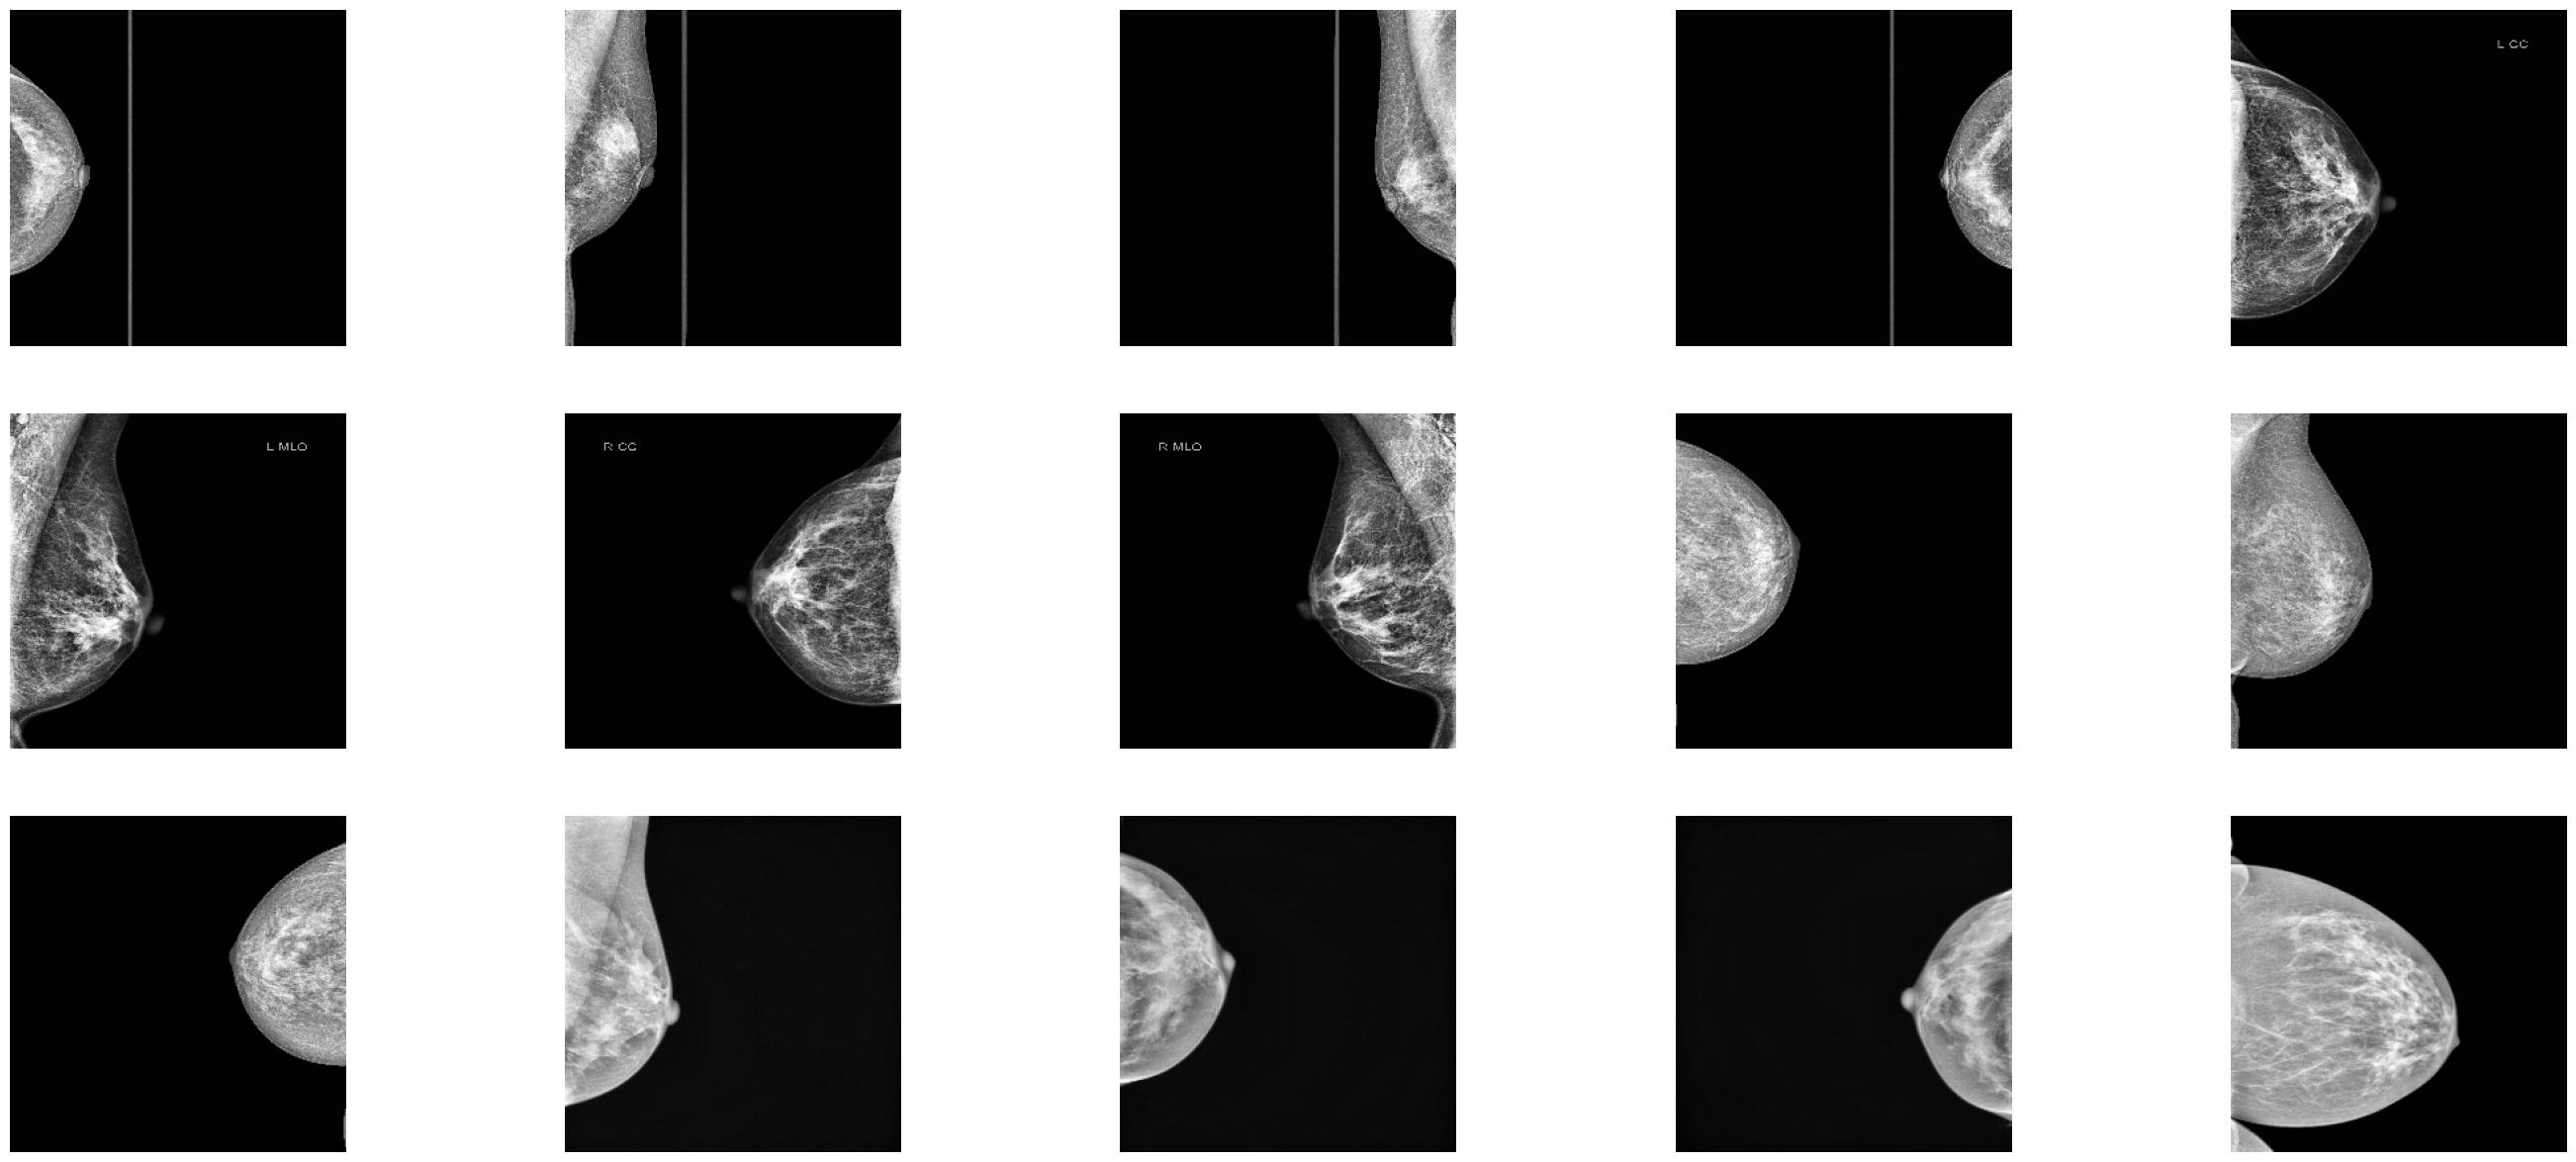

In [37]:
matplotlib.rcParams.update({'font.size': 14})
f, ax = plt.subplots(3, 5, figsize=(35,15))

for idx, (img, label) in enumerate(dataset.take(15)):
    ax[idx//5, idx%5].imshow((img.numpy()), cmap="gray");
    ax[idx//5, idx%5].axis('off')

In [35]:
def plot_images(filename):
    matplotlib.rcParams.update({'font.size': 14})
    f, ax = plt.subplots(3, 5, figsize=(35,15))
    dataset = (tf.data.TextLineDataset(filename).
      map(decode_csv))
    for idx, (img, label) in enumerate(dataset.take(15)):
        ax[idx//5, idx%5].imshow((img.numpy()));
        ax[idx//5, idx%5].axis('off')

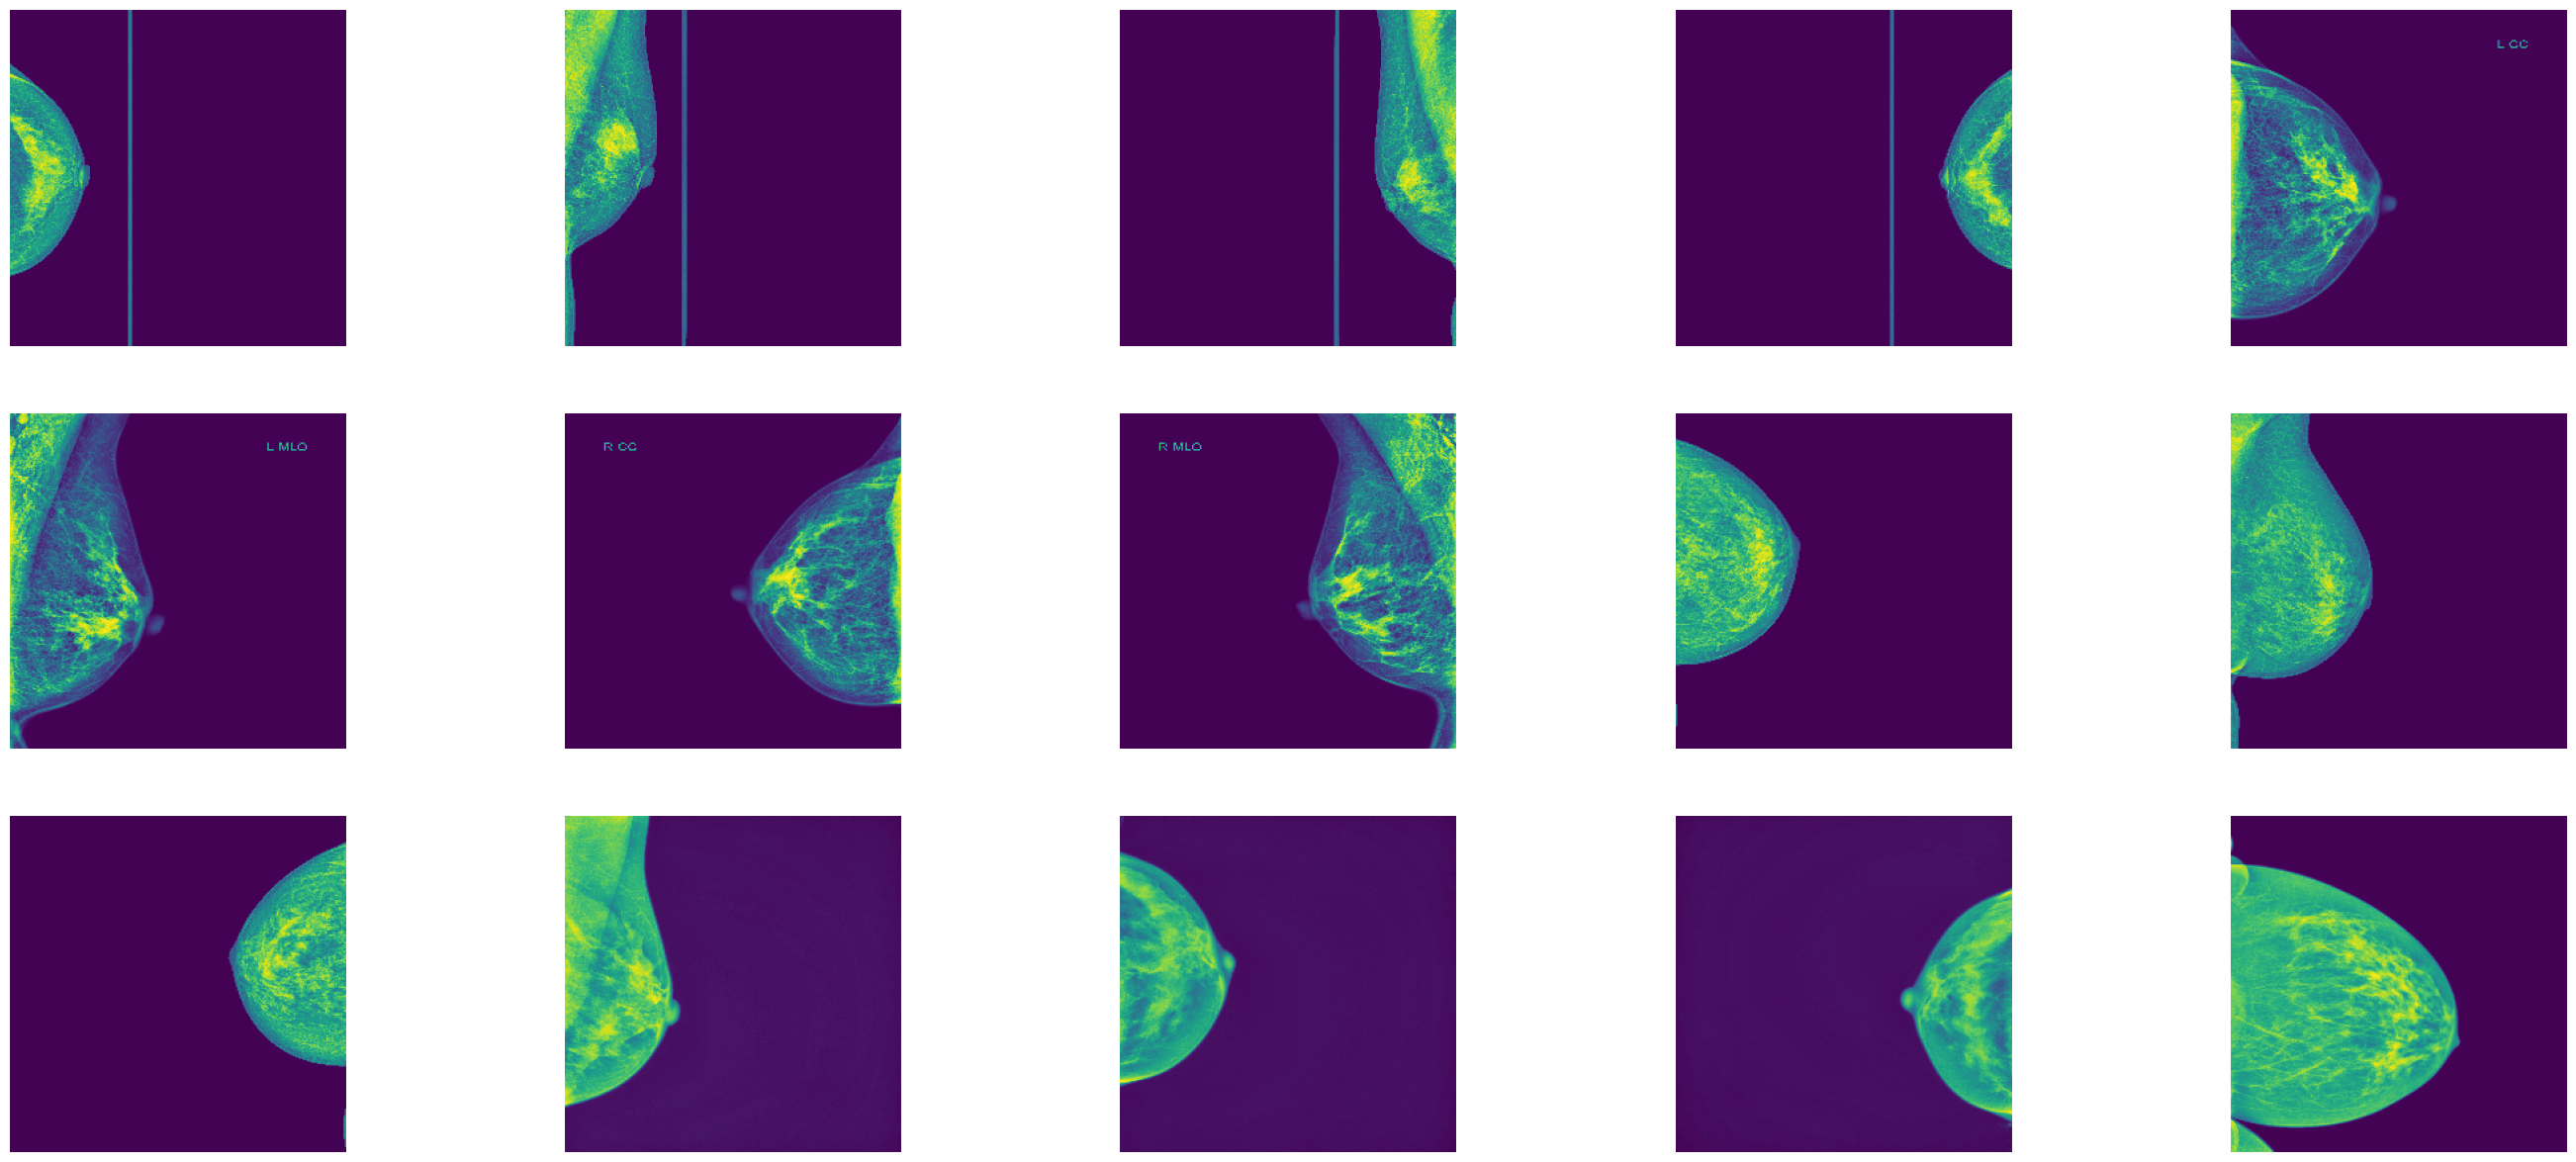

In [36]:
plot_images("new_train.csv")

In [138]:
def function():
    a = int(tf.random.normal(shape=()))
    tf.print(a)

    constant = tf.convert_to_tensor([a])
    tf.print(constant)

In [139]:
function

<function __main__.function()>

In [140]:
wrapped = tf.function(function)
wrapped()

0
[0]
